In [33]:

# import matplotlib.pyplot as plt
# import numpy as np 
# import pandas as pd 
# import os
# from astropy.constants import c
# from astropy import constants as const
# import astropy.units as u
# from scipy import special

# def weight(n):
#     g = 2*n**2
#     return g

# def boltzmann(n1,n2,eV,T):
#     k = 8.6173303e-5
#     g_n = weight(n2) /  weight(n1) * np.exp(-eV/(k*T) )
#     return g_n

# def CIV(T):
#     sigma_Lya = (5.9e-14) * (T/1e4)**(-1/2)
#     sigma_CIV = (0.19/0.4164) * sigma_Lya* (12)**(0.5)
#     N_CIV_0= 1 / sigma_CIV

#     return sigma_Lya, sigma_CIV, N_CIV_0

# sig_ly, sig_c, N_CIV_0 = CIV(1e5)

# print("{:.2e}".format( N_CIV_0))


# def tau(sig_c,x):
#     tt = sig_c*x
#     return tt
# rr = np.arange(12,18,1)
# ee =[13,20,32,50,79]
# #[13,20,32,50,79]

# C_IV_K = 1548.187e-8 #cm 
# C_IV_H = 1550.772e-8 #cm 
# cc =c.to(u.cm / u.s).value 
# v_th = 11.7673179819719e5 #cm/s


# rr_reshaped = rr.reshape(-1, 1)  # Reshape rr to a column vector
# total_N_c = 10**rr_reshaped * ee/10  # Broadcast and multiply
# total_N_c = total_N_c.flatten()

# K_gamma = 2.65e+8
# H_gamma = 2.64e+8
# f_CIV_K = 0.190
# f_CIV_H = 0.0952

# yy = np.arange(-5,5,0.1)


# def Voigt(x,gamma_line,lines):
#     del_lam_D = v_th / lines
#     a = gamma_line / (4*np.pi*del_lam_D)
#     dy = abs(yy[1]- yy[0])
#     summ = np.zeros(len(x))
#     for aa,bb in enumerate(x):
#         for ii,jj in enumerate(yy):
#             summ[aa] += np.exp(-jj**2) / ((bb-jj)**2+a**2) *dy
#     return summ*a/np.pi

# def change_x_to_lam(x,lines):
#     del_lam_D = v_th / lines
#     lam = np.zeros(len(xx))
#     for ii, jj in enumerate(xx):
#         lam[ii] = lines / (jj*v_th/cc + 1)
#     return lam
# NN = int(5e3)
# xx = np.linspace(-5,5,NN)



# C_iv_N = np.linspace(1e12,1e17,NN)
# total_tau = np.zeros((len(C_iv_N),NN))
# print('Start x_0')
# for ii, jj in enumerate(C_iv_N ):
#     total_tau[ii,:] = tau(sig_c,jj) * Voigt(xx,K_gamma,C_IV_K)
# x_0 = np.zeros(len(total_N_c))
# for ii,jj in enumerate(C_iv_N):
#     x_p = [0]
#     for aa,bb in enumerate(total_tau[ii][0:-1]):
#         y_0 = 1
#         slope= (y_0-bb)*(y_0 -total_tau[ii][aa+1])
#         if slope < 0 :
#             x_p = np.append(xx[aa],x_p)
#     x_0[ii] = np.max(x_p)  



# # total_tau = np.zeros((len(total_N_c),NN))
# # print('Start x_0')
# # for ii, jj in enumerate(total_N_c):
# #     total_tau[ii,:] = tau(sig_c,jj) * Voigt(xx,K_gamma,C_IV_K)
# # x_0 = np.zeros(len(total_N_c))
# # for ii,jj in enumerate(total_N_c):
# #     x_p = [0]
# #     for aa,bb in enumerate(total_tau[ii][0:-1]):
# #         y_0 = 1
# #         slope= (y_0-bb)*(y_0 -total_tau[ii][aa+1])
# #         if slope < 0 :
# #             x_p = np.append(xx[aa],x_p)
# #     x_0[ii] = np.max(x_p)  


3.39e+13


In [158]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c
import astropy.units as u
from scipy import special

def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x

rr = np.arange(12, 18, 1)
ee = [13, 20, 32, 50, 79]
rr_reshaped = rr.reshape(-1, 1)
total_N_c = 10**rr_reshaped * ee / 10
total_N_c = total_N_c.flatten()

C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm
cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952

NN = int(1e4)
xx = np.linspace(-5, 5, NN)
yy = np.linspace(-5, 5, NN)

def Voigt(x, gamma_line, lines):
    del_lam_D = v_th / lines
    a = gamma_line / (4 * np.pi * del_lam_D)
    dy = np.abs(yy[1] - yy[0])
    
    # Broadcasting and vectorized computation
    qq_minus_yy_squared = (x[:, np.newaxis] - yy)**2
    exp_neg_yy_squared = np.exp(-yy**2)
    
    summ = np.sum(exp_neg_yy_squared * dy / (qq_minus_yy_squared + a**2), axis=1)
    
    return summ * a / np.pi


def change_x_to_lam(x, lines):
    del_lam_D = v_th / lines
    return lines / (x * v_th / cc + 1)

# NN = int(100)
# xx = np.linspace(-5, 5, NN)

C_iv_N = np.linspace(3.39e13, 1e17, NN)
total_tau = np.zeros((len(C_iv_N), NN))
print('Start x_0')

# 벡터화된 tau 및 Voigt 프로파일 계산
Voigt_profile = Voigt(xx, K_gamma, C_IV_K)
tau_profile = tau(sig_c, C_iv_N[:, None]) * Voigt_profile

# x_0 계산
x_0 = np.zeros(len(C_iv_N ))
for ii, jj in enumerate(C_iv_N ):
    x_p = np.where(np.diff(np.sign(1 - tau_profile[ii, :])))[0]
    x_0[ii] = xx[x_p].max() if x_p.size > 0 else 0
del_lam_D_K = v_th/C_IV_K

v_esc = x_0*v_th
esc_scat =  1/special.erfc(v_esc/v_th)

3.39e+13
Start x_0


In [156]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c
import astropy.units as u
from scipy import special

def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x

rr = np.arange(12, 18, 1)
ee = [13, 20, 32, 50, 79]
rr_reshaped = rr.reshape(-1, 1)
total_N_c = 10**rr_reshaped * ee / 10
total_N_c = total_N_c.flatten()

C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm
cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952

NN = int(1e4)
xx = np.linspace(-5, 5, NN)
yy = np.linspace(-5, 5, NN)

def Voigt(x, gamma_line, lines):
    del_lam_D = v_th / lines
    a = gamma_line / (4 * np.pi * del_lam_D)
    dy = np.abs(yy[1] - yy[0])
    
    # Broadcasting and vectorized computation
    qq_minus_yy_squared = (x[:, np.newaxis] - yy)**2
    exp_neg_yy_squared = np.exp(-yy**2)
    
    summ = np.sum(exp_neg_yy_squared * dy / (qq_minus_yy_squared + a**2), axis=1)
    
    return summ * a / np.pi

def change_x_to_lam(x, lines):
    del_lam_D = v_th / lines
    return lines / (x * v_th / cc + 1)

C_iv_N = np.linspace(3.39e13, 1e17, NN)
total_tau = np.zeros((len(C_iv_N), NN))
print('Start x_0')

# 벡터화된 tau 및 Voigt 프로파일 계산
Voigt_profile = Voigt(xx, K_gamma, C_IV_K)
tau_profile = tau(sig_c, C_iv_N[:, None]) * Voigt_profile

# x_0 계산
x_0 = np.zeros(len(C_iv_N))
for ii, jj in enumerate(C_iv_N):
    x_p = np.where(np.diff(np.sign(1 - tau_profile[ii, :])))[0]
    x_0[ii] = xx[x_p].max() if x_p.size > 0 else 0

del_lam_D_K = v_th / C_IV_K
v_esc = x_0 * v_th
esc_scat = 1 / special.erfc(v_esc / v_th)

print(esc_scat)


3.39e+13
Start x_0
[2.49231223e+00 3.71717316e+00 4.96782442e+00 ... 2.44499640e+04
 2.44499640e+04 2.44499640e+04]


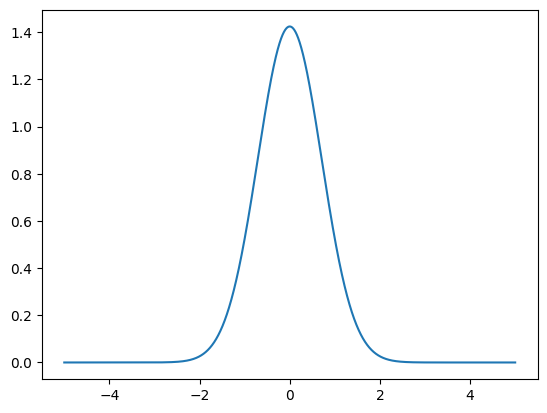

In [159]:

# def Voigt(x, gamma_line, lines):
#     del_lam_D = v_th / lines
#     a = gamma_line / (4 * np.pi * del_lam_D)
#     dy = np.abs(yy[1] - yy[0])
#     summ = np.zeros(len(x))
#     for ii,qq in enumerate(x):
#         summ[ii] = np.sum(np.exp(-yy**2)/ ((qq - yy)**2 + a**2)*dy, axis=0)

#     return summ * a / np.pi

# # xx = np.linspace(-1,1,5000)
# Voigt_profile = Voigt(xx, K_gamma, C_IV_K)
plt.plot(xx,Voigt_profile)

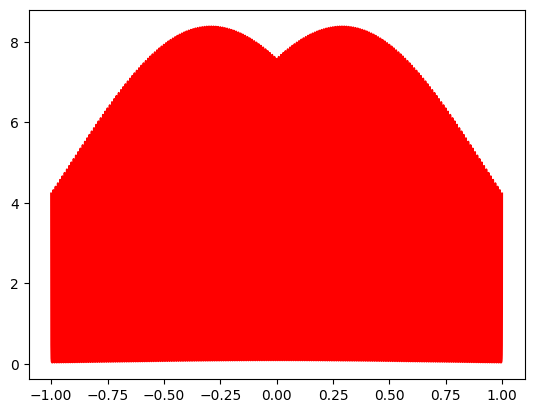

In [141]:
Voigt_profile = Voigt(xx, K_gamma, C_IV_K)
plt.plot(xx,Voigt_profile,'r')

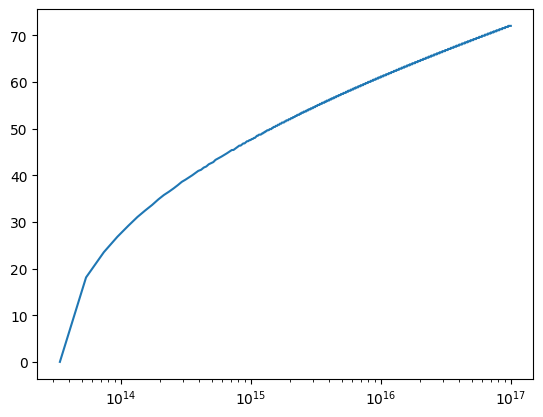

In [101]:
del_lam_D = v_th / C_IV_K
nu_0_K= cc/C_IV_K
nu_esc = x_0*del_lam_D + nu_0_K

V_del_peak = 2 * abs((nu_esc - nu_0_K)/nu_0_K) * cc/1e5 #km/s

plt.plot(C_iv_N ,V_del_peak)
plt.xscale('log')

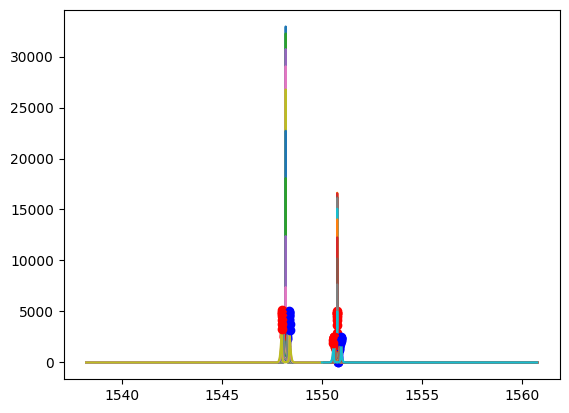

In [96]:
# rr = [16]
# ee = [79]
V_K_peak_1 = np.zeros(len(rr)*len(ee))
V_H_peak_1 = np.zeros(len(rr)*len(ee))

V_K_peak_2 = np.zeros(len(rr)*len(ee))
V_H_peak_2 = np.zeros(len(rr)*len(ee))

xx_1 = np.zeros(len(rr)*len(ee))
scat_1 = np.zeros(len(rr)*len(ee))

xx_2 = np.zeros(len(rr)*len(ee))
scat_2 = np.zeros(len(rr)*len(ee))

C_IV_K_A = 1548.187  # cm
C_IV_H_A = 1550.772

directory_1 = '~/바탕화면/C_IV/code_tes/data_C_IV/'
directory_2 = '~/바탕화면/analy/code_tes/data_C_IV/'
# /home/jin/바탕화면/C_IV/analy , '~/바탕화면/C_IV/code_tes/data_C_IV/'
n = 0 
for ii, num in enumerate(rr):
    for jj, bb in enumerate(ee):
        path_sp_1 = f'{directory_1}N_atom{bb}0E+{num}_Vexp000E+00_Vemit100E+00_tauD000E+00_Vran118E+01spec_com.dat'
        path_sp_2 = f'{directory_2}N_atom{bb}0E+{num}_Vexp000E+00_Vemit100E+00_tauD000E+00_Vran118E+01spec_com.dat'

        # Read data
        globals()[f'data_sp_1_{bb}_{num}'] = pd.read_csv(path_sp_1, sep='\s+', header=None)
        globals()[f'sp_dlam_1_{bb}_{num}'] = globals()[f'data_sp_1_{bb}_{num}'][0]
        globals()[f'sp_1_{bb}_{num}'] = globals()[f'data_sp_1_{bb}_{num}'][1]

        globals()[f'data_sp_2_{bb}_{num}'] = pd.read_csv(path_sp_2, sep='\s+', header=None)
        globals()[f'sp_dlam_2_{bb}_{num}'] = globals()[f'data_sp_2_{bb}_{num}'][0]
        globals()[f'sp_2_{bb}_{num}'] = globals()[f'data_sp_2_{bb}_{num}'][1]

        # Find indices for K and H lines
        indices_K_1 = np.where(globals()[f'sp_dlam_1_{bb}_{num}'] <= 1550)[0]
        indices_H_1 = np.where(globals()[f'sp_dlam_1_{bb}_{num}'] > 1550)[0]

        indices_K_2 = np.where(globals()[f'sp_dlam_2_{bb}_{num}'] <= 1550)[0]
        indices_H_2 = np.where(globals()[f'sp_dlam_2_{bb}_{num}'] > 1550)[0]

        # Create filtered series for K and H
        globals()[f'sp_dlam_K_1_{bb}_{num}'] = globals()[f'sp_dlam_1_{bb}_{num}'][indices_K_1]

        globals()[f'sp_dlam_H_1_{bb}_{num}'] = globals()[f'sp_dlam_1_{bb}_{num}'][indices_H_1]

        globals()[f'sp_K_1_{bb}_{num}'] = globals()[f'sp_1_{bb}_{num}'][indices_K_1]
        globals()[f'sp_H_1_{bb}_{num}'] = globals()[f'sp_1_{bb}_{num}'][indices_H_1]

        globals()[f'sp_dlam_K_2_{bb}_{num}'] = globals()[f'sp_dlam_2_{bb}_{num}'][indices_K_2]
        globals()[f'sp_dlam_H_2_{bb}_{num}'] = globals()[f'sp_dlam_2_{bb}_{num}'][indices_H_2]
        globals()[f'sp_K_2_{bb}_{num}'] = globals()[f'sp_2_{bb}_{num}'][indices_K_2]
        globals()[f'sp_H_2_{bb}_{num}'] = globals()[f'sp_2_{bb}_{num}'][indices_H_2]

        # # # Filter series for positive and negative wavelengths
        filtered_series_K_pos_1 = globals()[f'sp_K_1_{bb}_{num}'].where(globals()[f'sp_dlam_K_1_{bb}_{num}'] >= 0.01 + C_IV_K_A)
        filtered_series_K_neg_1 = globals()[f'sp_K_1_{bb}_{num}'].where(globals()[f'sp_dlam_K_1_{bb}_{num}'] <= -0.01 + C_IV_K_A)

        filtered_series_H_pos_1 = globals()[f'sp_H_1_{bb}_{num}'].where(globals()[f'sp_dlam_H_1_{bb}_{num}'] >=   0.01 + C_IV_H_A)
        filtered_series_H_neg_1 = globals()[f'sp_H_1_{bb}_{num}'].where(globals()[f'sp_dlam_H_1_{bb}_{num}'] <=  -0.01 + C_IV_H_A)

        filtered_series_K_pos_2 = globals()[f'sp_K_2_{bb}_{num}'].where(globals()[f'sp_dlam_K_2_{bb}_{num}'] >= 0.01 + C_IV_K_A)
        filtered_series_K_neg_2 = globals()[f'sp_K_2_{bb}_{num}'].where(globals()[f'sp_dlam_K_2_{bb}_{num}'] <= -0.01+ C_IV_K_A)
        filtered_series_H_pos_2 = globals()[f'sp_H_2_{bb}_{num}'].where(globals()[f'sp_dlam_H_2_{bb}_{num}'] >= 0.01 + C_IV_H_A)
        filtered_series_H_neg_2 = globals()[f'sp_H_2_{bb}_{num}'].where(globals()[f'sp_dlam_H_2_{bb}_{num}'] <= -0.01 + C_IV_H_A)

        # # Get peak indices
        K_p_1 = np.argmax(filtered_series_K_pos_1)
        K_n_1 = np.argmax(filtered_series_K_neg_1)
        K_p_2 = np.argmax(filtered_series_K_pos_2)
        K_n_2 = np.argmax(filtered_series_K_neg_2)

        H_p_1 = np.argmax(filtered_series_H_pos_1) + indices_H_1[0] 
        H_n_1 = np.argmax(filtered_series_H_neg_1) + indices_H_1[0] 
        H_p_2 = np.argmax(filtered_series_H_pos_2) + indices_H_2[0] 
        H_n_2 = np.argmax(filtered_series_H_neg_2) + indices_H_2[0] 

        # # Get peak values
        lam_K_1_1 = globals()[f'sp_dlam_K_1_{bb}_{num}'][K_p_1]
        lam_K_2_1 = globals()[f'sp_dlam_K_1_{bb}_{num}'][K_n_1]
        lam_K_1_2 = globals()[f'sp_dlam_K_2_{bb}_{num}'][K_p_2]
        lam_K_2_2 = globals()[f'sp_dlam_K_2_{bb}_{num}'][K_n_2]

        lam_H_1_1 = globals()[f'sp_dlam_H_1_{bb}_{num}'][H_p_1]
        lam_H_2_1 = globals()[f'sp_dlam_H_1_{bb}_{num}'][H_n_1]
        lam_H_1_2 = globals()[f'sp_dlam_H_2_{bb}_{num}'][H_p_2]
        lam_H_2_2 = globals()[f'sp_dlam_H_2_{bb}_{num}'][H_n_2]


        plt.plot(globals()[f'sp_dlam_K_1_{bb}_{num}'], globals()[f'sp_K_1_{bb}_{num}'])
        plt.plot(globals()[f'sp_dlam_H_1_{bb}_{num}'], globals()[f'sp_H_1_{bb}_{num}'])
        plt.plot(globals()[f'sp_dlam_K_1_{bb}_{num}'][K_p_1], globals()[f'sp_K_1_{bb}_{num}'][K_p_1],'bo')
        plt.plot(globals()[f'sp_dlam_K_1_{bb}_{num}'][K_n_1], globals()[f'sp_K_1_{bb}_{num}'][K_n_1],'ro')

        plt.plot(globals()[f'sp_dlam_H_1_{bb}_{num}'][H_p_1], globals()[f'sp_H_1_{bb}_{num}'][H_p_1],'bo')
        plt.plot(globals()[f'sp_dlam_H_1_{bb}_{num}'][H_n_1], globals()[f'sp_H_1_{bb}_{num}'][H_n_1],'ro')



        # # # Calculate peak velocity differences
        del_V_peak_K_1 = (abs(lam_K_1_1 - lam_K_2_1)*1e-8 / C_IV_K) * cc / 1e5
        del_V_peak_H_1 = (abs(lam_H_1_1 - lam_H_2_1)*1e-8   / C_IV_H) * cc /1e5

        del_V_peak_K_2 = (abs(lam_K_1_2 - lam_K_2_2)*1e-8  / C_IV_K) * cc /1e5
        del_V_peak_H_2 = (abs(lam_H_1_2 - lam_H_2_2)*1e-8  / C_IV_H) * cc /1e5

        # Check conditions and set velocities to 0 if conditions are met
        if globals()[f'sp_dlam_K_1_{bb}_{num}'][K_p_1] <= globals()[f'sp_dlam_K_1_{bb}_{num}'][K_p_1-1]:
            del_V_peak_K_1 = 0
        if globals()[f'sp_dlam_H_1_{bb}_{num}'][H_p_1] <= globals()[f'sp_dlam_H_1_{bb}_{num}'][H_p_1-1]:
            del_V_peak_H_1 = 0

        if globals()[f'sp_dlam_K_2_{bb}_{num}'][K_p_2] <= globals()[f'sp_dlam_K_2_{bb}_{num}'][K_p_2-1]:
            del_V_peak_K_2 = 0
        if globals()[f'sp_dlam_H_2_{bb}_{num}'][H_p_2] <= globals()[f'sp_dlam_H_2_{bb}_{num}'][H_p_2-1]:
            del_V_peak_H_2 = 0

        V_K_peak_1[n] = del_V_peak_K_1
        V_H_peak_1[n] = del_V_peak_H_1
        xx_1[n] = 10**num * bb / 10
        # print(del_V_peak_K_1)
        V_K_peak_2[n] = del_V_peak_K_2
        V_H_peak_2[n] = del_V_peak_H_2
        xx_2[n] = 10**num * bb / 10


        path_scat_1 = f'{directory_1}N_atom{bb}0E+{num}_Vexp000E+00_Vemit100E+00_tauD000E+00_Vran118E+01_f_esc.dat'

        globals()[f'data_scat_1_{bb}_{num}'] = pd.read_csv(path_scat_1, sep='\s+', header=None)
        scat_1[n]= float(globals()[f'data_scat_1_{bb}_{num}'].iloc[0,4])
    



        n += 1

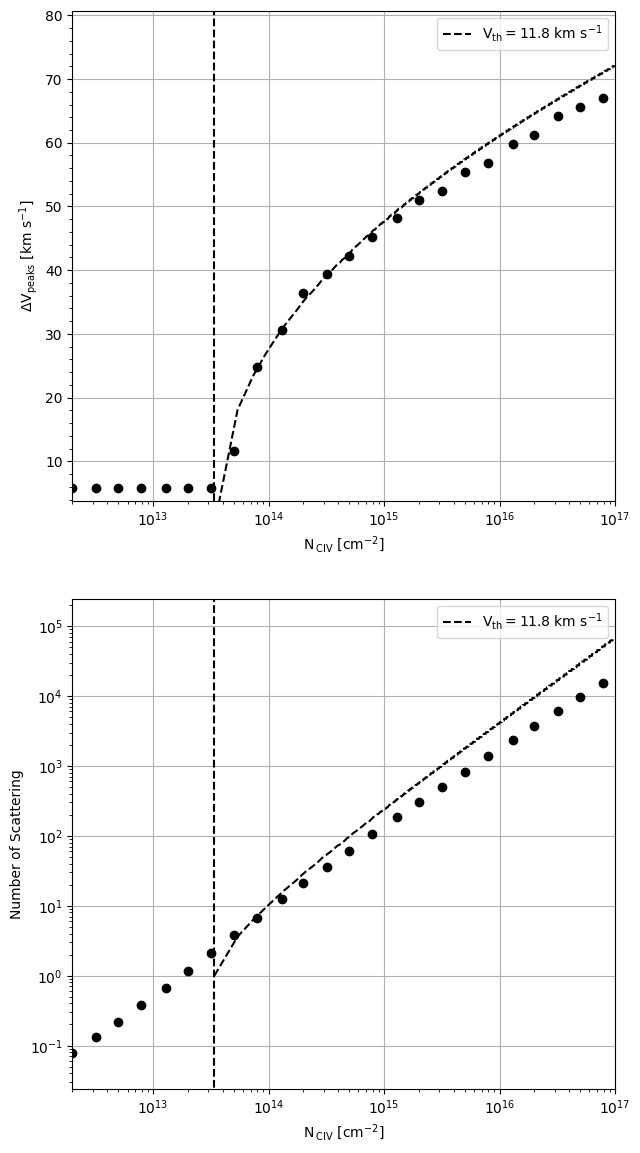

In [102]:
fig = plt.figure(1,figsize=(7,14))
aa = np.where(x_0 > 0)
xa= x_0[aa]

plt.subplot(211)
plt.plot(xx_1,V_K_peak_1,'ko')
# plt.plot(xx_2,V_K_peak_2,'k--')
plt.plot(C_iv_N,V_del_peak,'k--')
plt.axvline(x=3.39e13,ymin=0,ymax=80,color='k',linestyle='--',label='${\mathrm{V_{th}}} = 11.8$ km s$^{-1}$')
plt.xlabel(r'$\mathrm{N} \, _{\mathrm{C IV}}$ [cm$^{-2}$]')
plt.xscale('log')
plt.xlim(2*10**12,10**17)
plt.ylim(V_K_peak_1.min()-2,V_K_peak_1.max()+2)
plt.ylabel(r'$\Delta \mathrm{V}_{\mathrm{peaks}}$ [km s$^{-1}$]')
plt.minorticks_on()
plt.grid()
plt.legend()

plt.subplot(212)
plt.plot(xx_1,scat_1,'ko')
plt.plot(C_iv_N,esc_scat,'k--')
plt.axvline(x=3.39e13,ymin=scat_1.min()-10,ymax=2,color='k',linestyle='--',label='${\mathrm{V_{th}}} = 11.8$ km s$^{-1}$')
plt.xlabel(r'$\mathrm{N} \, _{\mathrm{C IV}}$ [cm$^{-2}$]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(2*10**12,10**17)
# plt.ylim(scat.min(),scat.max()+2)
plt.ylabel(r'Number of Scattering')
plt.minorticks_on()
plt.grid()
plt.legend()


# plt.savefig('/home/jin/바탕화면/result')



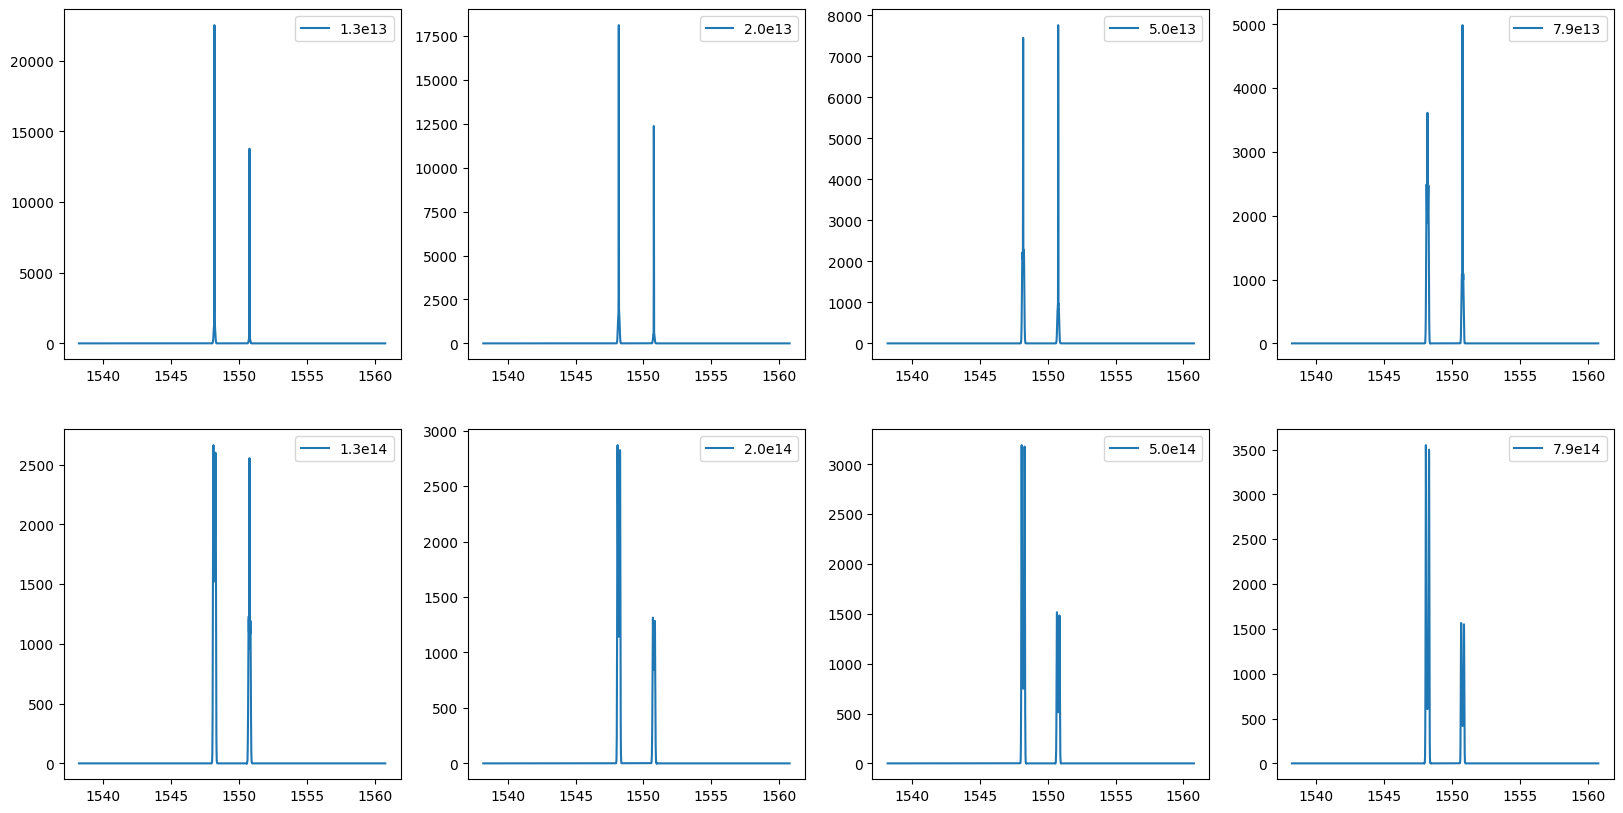

In [ ]:
fig = plt.figure(1,figsize=(20,10))
plt.subplot(241)
plt.plot(sp_com_lam_13_13,sp_com_F_13_13,label='1.3e13')
# plt.xlim(-1,1)
plt.legend()

plt.subplot(242)
plt.plot(sp_com_lam_20_13,sp_com_F_20_13,label='2.0e13')
# plt.xlim(-1,1)
plt.legend()


plt.subplot(243)
plt.plot(sp_com_lam_50_13,sp_com_F_50_13,label='5.0e13')
# plt.xlim(-1,1)
plt.legend()


plt.subplot(244)
plt.plot(sp_com_lam_79_13,sp_com_F_79_13,label='7.9e13')
# plt.xlim(-1,1)
plt.legend()


plt.subplot(245)
plt.plot(sp_com_lam_13_14,sp_com_F_13_14,label='1.3e14')
# plt.xlim(-1,1)
plt.legend()

plt.subplot(246)
plt.plot(sp_com_lam_20_14,sp_com_F_20_14,label='2.0e14')
# plt.xlim(-1,1)
plt.legend()


plt.subplot(247)
plt.plot(sp_com_lam_50_14,sp_com_F_50_14,label='5.0e14')
# plt.xlim(-1,1)
plt.legend()


plt.subplot(248)
plt.plot(sp_com_lam_79_14,sp_com_F_79_14,label='7.9e14')
# plt.xlim(-1,1)
plt.legend()



